In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA

### Create labels

In [2]:
df = pd.read_csv(f'data\VDR_ds_london_3KPZ.csv', index_col=0)
df['labels'] = np.where(df.id.str.contains("VDRML"), "molpher",
                        np.where(df.id.str.contains("CHEMBL"), "actives", "decoys"))
df

,id,smiles,docking_score_london_3KPZ,labels
0,CHEMBL466792,O[C@@H]1CC(C[C@@H](O)C1=C)=C\C=C/1\[C@@H]2CC[C...,-17.400385,actives
1,C23259752,S(c1cc(ccc1C)C)c1ccc(NC(=O)CN([C@H](C)c2ccc(S(...,-13.606252,decoys
2,C20572491,Brc1cc2c(nc(cc2C(=O)N\N=C(\C)/c2ccc(cc2)C(C)(C...,-15.338774,decoys
3,CHEMBL2171448,FC(F)(F)C(O)(\C=C\C=C(/CC)\c1cc(OCc2cc(CO)c(cc...,-14.932643,actives
4,CHEMBL226380,FCC=C1[C@H](O)CC(C[C@H]1O)=C\C=C/1\[C@@H]2CC[C...,-16.172329,actives
...,...,...,...,...
17535,VDRML1781,O1CCN(CC1)CCCNC(=O)CC(O)(CCC)c1cc(C)c(OCCC(CC)...,-6.468252,molpher
17536,VDRML19748,S(=O)(=O)(Cc1ccc(OC)nc1)c1c2nc3c(nc2n(c1NC(=O)...,-5.161962,molpher
17537,VDRML16884,Clc1cc(n(C)c1C(NC(CC)(C(O)=O)C)=C)C(CC)(CC)c1c...,-4.850483,molpher
17538,VDRML19751,S(=O)(=O)(Nc1ccc(OC)nc1)c1c2nc3c(nc2n(c1NC(=O)...,-6.188633,molpher


### PCA and SCREE plot

In [3]:
df_ordered = df.sort_values(by=['labels'], ascending=False) # sort df so the mopher data are not over the smaller dataset of actives and decoys
mols = [AllChem.MolFromSmiles(m) for m in df_ordered.smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in mols]

In [4]:
pca = PCA(0.9) #90 % of explained variance
pca.fit(fps)
fps_pca = pca.transform(fps)

shape:  (17540, 532)


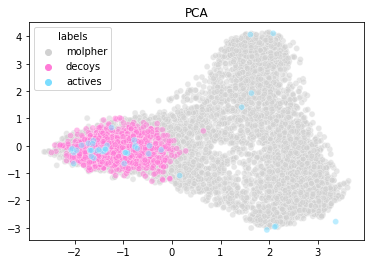

In [5]:
colors =['#D1D1D1', '#FF7BD7', '#7BDDFF']
plot = sns.scatterplot(x=fps_pca[:,0], y=fps_pca[:,1], hue=df_ordered['labels'], 
                       alpha=0.5, palette=colors).set_title('PCA')
print('shape: ', fps_pca.shape)

### SCREE plot, explained variance

Text(0, 0.5, 'explained variance')

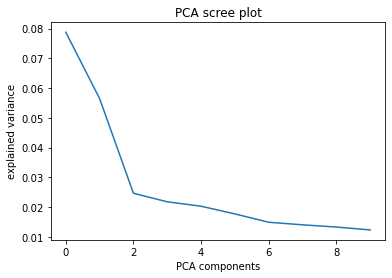

In [7]:
expl_Var = pca.explained_variance_ratio_[:10]
plot = sns.lineplot(x=range(len(expl_Var)), y=expl_Var).set_title('PCA scree plot')
plt.xlabel('PCA components')
plt.ylabel('explained variance')